##### <font color='blue'> Deep Learning with Python</font> by François Chollet
### 2.2 Data representation for neural networks
* focus on data structures for images, time series etc.
***

#### Scalars (0D tensors)

In [ ]:
import numpy as np
x = np.array(12)
print(x)

In [4]:
x.ndim

0

#### Vectors (1D tensors)

In [7]:
x = np.array([12, 3, 4, 3, 4])
x

array([12,  3,  4,  3,  4])

In [8]:
x.ndim

1

This vector has five entries and so is called a **5-dimensional vector**. *Don’t confuse a **5D
vector** with a **5D tensor**!* A 5D vector has only one *axis* and has five *dimensions along its
axis*, whereas a 5D tensor has five axes (and may have any number of dimensions
along each axis). ***Dimensionality*** can denote either the number of entries along a specific
axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a
5D tensor), which can be confusing at times. In the latter case, it’s technically more
correct to talk about a tensor of **rank** 5 (the rank of a tensor being the number of axes),
but the ambiguous notation 5D tensor is common regardless.

#### Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to
rows and columns). You can visually interpret a matrix as a rectangular grid of numbers.

In [10]:
x = np.array([[4, 56, 3, 55, 0],
              [3, 43, 53, 1, 4],
              [4, 24, 52, 3, 2]])
x.ndim

2

#### 3D tensors and higher-dimensional tensors
* pack matrices in a new array
* a cube of numbers

In [12]:
x = np.array([[[4, 56, 3, 55, 0],
              [3, 43, 53, 1, 4],
              [4, 24, 52, 3, 2]],
              [[4, 56, 3, 55, 0],
              [3, 43, 53, 1, 4],
              [4, 24, 52, 3, 2]],
              [[4, 56, 3, 55, 0],
              [3, 43, 53, 1, 4],
              [4, 24, 52, 3, 2]]])
x.ndim

3

* by packing 3D tensors in an array, 4D tensor ....
* In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

##### Key attributes of a tensor
* Number of axes (rank)—
* shape
* data type(dtype in Python library)

In [14]:
import keras
keras.__version__

'2.4.3'

In [15]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
print(train_images.ndim)

3


In [17]:
print(train_images.shape)

(60000, 28, 28)


In [18]:
print(train_images.dtype)

uint8


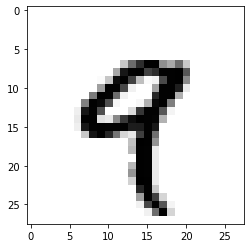

In [19]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 2.2.6 manipulating tensors in Numpy

In [26]:
# tensor slicing
#my_slice = train_images[10:100, :,:]
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [22]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [27]:
# crop the images to patches of 14*14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

#### 2.2.7 notation of data batches
* axis 0 : sample axis(*samples dimension*)
* batch axis or batch dimension

In [29]:
batch = train_images[:128]
# batch = train_images[128 * n:128 * (n + 1)]

#### 2.2.8 Real world examples of data tensors
* Vector data - 2D tensors of shape (samples, features)
* Timeseries data or sequence data - 3D tensors of shape (samples, timesteps, features)
* Images - 4D tensors of shape(samples, height, width, channels) or (samples, channels, height, width)
* Video - 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, chanels, height, width)

#### Vector data
* 3 features(zip, age, income) of 200,000 people to 2D tensor (200,000, 3); each persion can be charaterized as a vector of 3 vaules of feature
* 500 text documents represented the counting number of word appeared in it among 20,000 common words (500, 20000)

#### timeseries data or sequence data
* each sample can be encoded as a sequence of vectors(2D tensor) of features and timesteps
* batch data is encoded as a 3D tensor

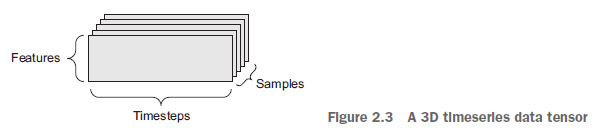

In [30]:
from IPython.display import Image
%matplotlib inline

Image(filename='../img/timeseries.png', width=300)

* Examples
    - stock prices (390, 3) highest, lowest, current prices at every minute in a trading day; 250 days' worth of data (250, 390, 3)
    - tweets encoded as a sequence of 280 characters out of an alphabet of 128 unique characters(ASCII ?) (280, 128); 1 million tweets (1,000,000, 280, 128)

#### Image data
* image in 3D - height, width, color depth (256,256, 3) for color channel; (256, 256, 1) for one(gray) channel
* batch of 128 grayscale images of size 256*256 is (128, 256,256, 1)

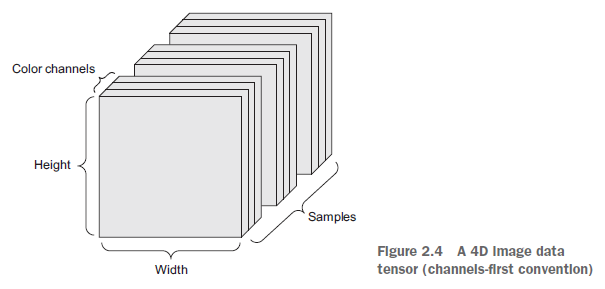

In [31]:
Image(filename='../img/4Dcolor.PNG', width=300)

#### Video data
* each frame can be stored in a 3D tensor (height, width, color_depth)
* a sequence of frames can be stored in a 4D tensor (frames, height, width, color_
depth)
* a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth).
***
### 2.3 gears of neural networks: tensor operations
* deep neural networks can be reduced to a handful of **tensor operations** applied to tensors of numeric data
* we build our network by stacking *Dense* layers on top of each other, in Keras
```
keras.layers.Dense(512, activation='relu')
```
This layer can be interpreted as s funtion as
```
output = relu(dot(W, input)+b)
```

#### Element-wise operations
* *element-wise operation* are amenable to massively *parallel implementations*(*vectorized implementations*, the term comes from the *vector processor* supercomputer archietecture)
* naive Python implemenation using *for* loop
```
def naive_relu(x):
    asser len(x.shape) == 2 ; x is 2D numpy tensor
    x = x.copy()    ; avoid overwriting the input tensor
    for i in range(x.shape[0]);
        for j in range(x.shape[1]):
            x[i, j] = max(x[i,j], 0)
    return x
```
* BLAS(Basic Linear Algebra Subprograms) - low level, highly parallel, efficient tensor-manipulation routines in Fortran and C
```
import numpy as np
z = x + y
z = np.maximum(z, 0.)
```

#### Broadcasting
* addition of two tensors in different shapes - smaller tensor is broadcasted to match the shape of the larger tensor
* no 2D tensor is created; the repetition operation is virtually happens at the algorithm level rather than at the memory level
```
det naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x
```
* broadcasting : one tensor has shape (a, b, … n, n + 1, … m) and the other has shape (n, n + 1, … m). The
broadcasting will then automatically happen for axes a through n - 1.

```
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)
```
***
#### Tensor dot
* tensor product
* element-wise product by * operator in Numpy, Keras, Theano, Tensorflow
```
import numpy as np
# in Numpy and Keras
z = np.dot(x, y)
```
* in math, $z = x \cdot y$
```
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]):
        z == x[i] * y[i]
    return z
```
* higher dimension; (a, b, c, d) . (d,) -> (a, b, c)
(a, b, c, d) . (d, e) -> (a, b, c, e)

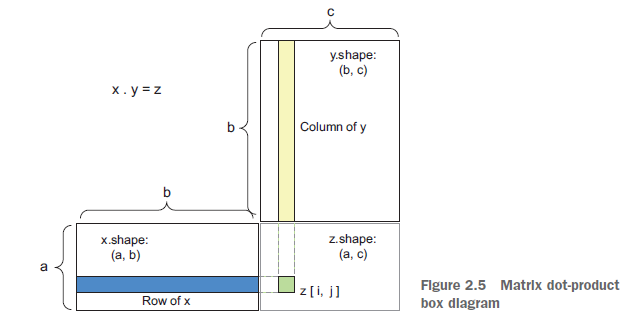

In [32]:
Image(filename='../img/dotproduct.PNG', width=300)

#### tensor reshaping

rearranging its rows and columns to match a target shape

In [33]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])

In [34]:
print(x.shape)

(3, 2)


In [35]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [36]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [37]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


#### geometric interpretation of tensor operations


